# Lab 5

Soroush Famili, James Lu, Nithanth Ram

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import requests
from bs4 import BeautifulSoup
from collections import Counter
import PyPDF2 # Run "conda install -c conda-forge pypdf2"
import io
import re
from tika import parser
import math
from random import choices
from nltk.util import ngrams

## Problem 2: Scraping, Entropy and ICML papers.

ICML – the International Conference on Machine Learning – is a top research conference in Machine
learning. Scrape all the pdfs of all ICML 2019 papers from http://proceedings.mlr.press/v97/.

In [5]:
url = "http://proceedings.mlr.press/v97/"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Proceedings of Machine Learning Research
  </title>
  <meta content="Proceedings of the 36th International Conference on Machine Learning
  Held in Long Beach, California, USA on 09-15 June 2019

Published as Volume 97 by the Proceedings of Machine Learning Research on 24 May 2019.

Volume Edited by:
  Kamalika Chaudhuri
  Ruslan Salakhutdinov

Series Editors:
  Neil D. Lawrence
  Mark Reid
" name="description"/>
  <link href="../css/main.css" rel="stylesheet" type="text/css"/>
  <script>
   (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','//www.google-analytics.com/analyt

In [6]:
content = soup.findAll(attrs={"target":"_blank"})

sub_url = "http://proceedings.mlr.press/v97/"
extension = "supp.pdf"

pdfs = []

for entry in content:
    
    href = entry["href"]
    if sub_url in href: # Take out the github links
        if extension not in href: # Take out the supplementary pdfs
            pdfs.append(href)
            print(href)

http://proceedings.mlr.press/v97/abbati19a/abbati19a.pdf
http://proceedings.mlr.press/v97/abels19a/abels19a.pdf
http://proceedings.mlr.press/v97/abu-el-haija19a/abu-el-haija19a.pdf
http://proceedings.mlr.press/v97/acharya19a/acharya19a.pdf
http://proceedings.mlr.press/v97/acharya19b/acharya19b.pdf
http://proceedings.mlr.press/v97/acharya19c/acharya19c.pdf
http://proceedings.mlr.press/v97/adams19a/adams19a.pdf
http://proceedings.mlr.press/v97/adel19a/adel19a.pdf
http://proceedings.mlr.press/v97/adiga19a/adiga19a.pdf
http://proceedings.mlr.press/v97/agarwal19a/agarwal19a.pdf
http://proceedings.mlr.press/v97/agarwal19b/agarwal19b.pdf
http://proceedings.mlr.press/v97/agarwal19c/agarwal19c.pdf
http://proceedings.mlr.press/v97/agarwal19d/agarwal19d.pdf
http://proceedings.mlr.press/v97/agarwal19e/agarwal19e.pdf
http://proceedings.mlr.press/v97/agrawal19a/agrawal19a.pdf
http://proceedings.mlr.press/v97/ahmed19a/ahmed19a.pdf
http://proceedings.mlr.press/v97/aivodji19a/aivodji19a.pdf
http://proc

1.  What are the top 10 common words in the ICML papers?

In [30]:
# This code block goes through every pdf, hence it takes about 10 minutes to run.

i = 0
words = []

for pdf in pdfs:
    
    print(i)
    content = parser.from_file(pdf)["content"]
    
    words += re.sub("[^\w]", " ", content).split()

    
    i += 1
    

2019-10-07 16:46:53,940 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/abbati19a/abbati19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-abbati19a-abbati19a-pdf.


0


2019-10-07 16:46:54,515 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/abels19a/abels19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-abels19a-abels19a-pdf.


1


2019-10-07 16:46:55,150 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/abu-el-haija19a/abu-el-haija19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-abu-el-haija19a-abu-el-haija19a-pdf.


2


2019-10-07 16:46:55,483 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/acharya19a/acharya19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-acharya19a-acharya19a-pdf.


3


2019-10-07 16:46:55,828 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/acharya19b/acharya19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-acharya19b-acharya19b-pdf.


4


2019-10-07 16:46:56,747 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/acharya19c/acharya19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-acharya19c-acharya19c-pdf.


5


2019-10-07 16:46:57,331 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/adams19a/adams19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-adams19a-adams19a-pdf.


6


2019-10-07 16:46:58,418 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/adel19a/adel19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-adel19a-adel19a-pdf.


7


2019-10-07 16:46:59,324 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/adiga19a/adiga19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-adiga19a-adiga19a-pdf.


8


2019-10-07 16:46:59,793 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/agarwal19a/agarwal19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-agarwal19a-agarwal19a-pdf.


9


2019-10-07 16:47:00,570 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/agarwal19b/agarwal19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-agarwal19b-agarwal19b-pdf.


10


2019-10-07 16:47:01,113 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/agarwal19c/agarwal19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-agarwal19c-agarwal19c-pdf.


11


2019-10-07 16:47:01,438 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/agarwal19d/agarwal19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-agarwal19d-agarwal19d-pdf.


12


2019-10-07 16:47:01,854 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/agarwal19e/agarwal19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-agarwal19e-agarwal19e-pdf.


13


2019-10-07 16:47:02,584 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/agrawal19a/agrawal19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-agrawal19a-agrawal19a-pdf.


14


2019-10-07 16:47:03,076 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ahmed19a/ahmed19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ahmed19a-ahmed19a-pdf.


15


2019-10-07 16:47:03,488 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/aivodji19a/aivodji19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-aivodji19a-aivodji19a-pdf.


16


2019-10-07 16:47:03,892 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/akimoto19a/akimoto19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-akimoto19a-akimoto19a-pdf.


17


2019-10-07 16:47:04,358 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/akrour19a/akrour19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-akrour19a-akrour19a-pdf.


18


2019-10-07 16:47:05,135 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/alaa19a/alaa19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-alaa19a-alaa19a-pdf.


19


2019-10-07 16:47:05,682 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/albuquerque19a/albuquerque19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-albuquerque19a-albuquerque19a-pdf.


20


2019-10-07 16:47:06,420 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/alet19a/alet19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-alet19a-alet19a-pdf.


21


2019-10-07 16:47:09,116 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/allen19a/allen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-allen19a-allen19a-pdf.


22


2019-10-07 16:47:09,612 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/allen19b/allen19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-allen19b-allen19b-pdf.


23


2019-10-07 16:47:10,050 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/allen-zhu19a/allen-zhu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-allen-zhu19a-allen-zhu19a-pdf.


24


2019-10-07 16:47:10,512 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/alvi19a/alvi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-alvi19a-alvi19a-pdf.


25


2019-10-07 16:47:11,648 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/amin19a/amin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-amin19a-amin19a-pdf.


26


2019-10-07 16:47:12,338 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ancona19a/ancona19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ancona19a-ancona19a-pdf.


27


2019-10-07 16:47:12,756 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/anderton19a/anderton19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-anderton19a-anderton19a-pdf.


28


2019-10-07 16:47:13,392 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/anil19a/anil19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-anil19a-anil19a-pdf.


29


2019-10-07 16:47:14,032 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/antelmi19a/antelmi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-antelmi19a-antelmi19a-pdf.


30


2019-10-07 16:47:14,493 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/arazo19a/arazo19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-arazo19a-arazo19a-pdf.


31


2019-10-07 16:47:15,841 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/arora19a/arora19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-arora19a-arora19a-pdf.


32


2019-10-07 16:47:16,385 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/assadi19a/assadi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-assadi19a-assadi19a-pdf.


33


2019-10-07 16:47:16,703 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/assran19a/assran19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-assran19a-assran19a-pdf.


34


2019-10-07 16:47:17,070 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/astudillo19a/astudillo19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-astudillo19a-astudillo19a-pdf.


35


2019-10-07 16:47:19,101 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/atasu19a/atasu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-atasu19a-atasu19a-pdf.


36


2019-10-07 16:47:19,513 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/awan19a/awan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-awan19a-awan19a-pdf.


37


2019-10-07 16:47:19,947 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/aydore19a/aydore19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-aydore19a-aydore19a-pdf.


38


2019-10-07 16:47:20,852 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ayed19a/ayed19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ayed19a-ayed19a-pdf.


39


2019-10-07 16:47:21,294 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/backurs19a/backurs19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-backurs19a-backurs19a-pdf.


40


2019-10-07 16:47:21,748 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/balaji19a/balaji19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-balaji19a-balaji19a-pdf.


41


2019-10-07 16:47:22,529 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/balcan19a/balcan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-balcan19a-balcan19a-pdf.


42


2019-10-07 16:47:22,987 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/balduzzi19a/balduzzi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-balduzzi19a-balduzzi19a-pdf.


43


2019-10-07 16:47:23,386 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/balin19a/balin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-balin19a-balin19a-pdf.


44


2019-10-07 16:47:23,763 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bansal19a/bansal19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bansal19a-bansal19a-pdf.


45


2019-10-07 16:47:24,167 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bapst19a/bapst19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bapst19a-bapst19a-pdf.


46


2019-10-07 16:47:24,605 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/baranchuk19a/baranchuk19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-baranchuk19a-baranchuk19a-pdf.


47


2019-10-07 16:47:25,059 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/barros19a/barros19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-barros19a-barros19a-pdf.


48


2019-10-07 16:47:25,605 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bartlett19a/bartlett19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bartlett19a-bartlett19a-pdf.


49


2019-10-07 16:47:26,028 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/basu19a/basu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-basu19a-basu19a-pdf.


50


2019-10-07 16:47:26,504 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bateni19a/bateni19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bateni19a-bateni19a-pdf.


51


2019-10-07 16:47:26,839 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/batson19a/batson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-batson19a-batson19a-pdf.


52


2019-10-07 16:47:27,752 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/beatson19a/beatson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-beatson19a-beatson19a-pdf.


53


2019-10-07 16:47:28,420 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/becker19a/becker19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-becker19a-becker19a-pdf.


54


2019-10-07 16:47:28,764 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/becker-ehmck19a/becker-ehmck19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-becker-ehmck19a-becker-ehmck19a-pdf.


55


2019-10-07 16:47:29,185 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/behpour19a/behpour19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-behpour19a-behpour19a-pdf.


56


2019-10-07 16:47:29,732 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/behrmann19a/behrmann19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-behrmann19a-behrmann19a-pdf.


57


2019-10-07 16:47:30,311 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/belilovsky19a/belilovsky19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-belilovsky19a-belilovsky19a-pdf.


58


2019-10-07 16:47:30,689 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/benyahia19a/benyahia19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-benyahia19a-benyahia19a-pdf.


59


2019-10-07 16:47:31,288 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/benzing19a/benzing19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-benzing19a-benzing19a-pdf.


60


2019-10-07 16:47:31,837 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bertran19a/bertran19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bertran19a-bertran19a-pdf.


61


2019-10-07 16:47:32,566 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/beygelzimer19a/beygelzimer19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-beygelzimer19a-beygelzimer19a-pdf.


62


2019-10-07 16:47:32,930 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bhagoji19a/bhagoji19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bhagoji19a-bhagoji19a-pdf.


63


2019-10-07 16:47:33,435 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bian19a/bian19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bian19a-bian19a-pdf.


64


2019-10-07 16:47:34,665 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bibaut19a/bibaut19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bibaut19a-bibaut19a-pdf.


65


2019-10-07 16:47:35,058 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bietti19a/bietti19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bietti19a-bietti19a-pdf.


66


2019-10-07 16:47:35,439 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/blau19a/blau19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-blau19a-blau19a-pdf.


67


2019-10-07 16:47:36,446 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/boda19a/boda19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-boda19a-boda19a-pdf.


68


2019-10-07 16:47:36,862 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bojchevski19a/bojchevski19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bojchevski19a-bojchevski19a-pdf.


69


2019-10-07 16:47:37,634 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/borsos19a/borsos19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-borsos19a-borsos19a-pdf.


70


2019-10-07 16:47:38,876 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bose19a/bose19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bose19a-bose19a-pdf.


71


2019-10-07 16:47:39,192 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bouthillier19a/bouthillier19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bouthillier19a-bouthillier19a-pdf.


72


2019-10-07 16:47:39,837 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/braun19a/braun19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-braun19a-braun19a-pdf.


73


2019-10-07 16:47:40,703 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/braverman19a/braverman19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-braverman19a-braverman19a-pdf.


74


2019-10-07 16:47:41,292 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bregere19a/bregere19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bregere19a-bregere19a-pdf.


75


2019-10-07 16:47:42,705 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bridges19a/bridges19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bridges19a-bridges19a-pdf.


76


2019-10-07 16:47:44,802 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/brookes19a/brookes19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-brookes19a-brookes19a-pdf.


77


2019-10-07 16:47:45,522 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/brown19a/brown19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-brown19a-brown19a-pdf.


78


2019-10-07 16:47:46,123 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/brown19b/brown19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-brown19b-brown19b-pdf.


79


2019-10-07 16:47:46,863 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/brunet19a/brunet19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-brunet19a-brunet19a-pdf.


80


2019-10-07 16:47:47,255 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/brutzkus19a/brutzkus19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-brutzkus19a-brutzkus19a-pdf.


81


2019-10-07 16:47:47,581 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/brutzkus19b/brutzkus19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-brutzkus19b-brutzkus19b-pdf.


82


2019-10-07 16:47:48,232 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bubeck19a/bubeck19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bubeck19a-bubeck19a-pdf.


83


2019-10-07 16:47:48,531 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/buchnik19a/buchnik19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-buchnik19a-buchnik19a-pdf.


84


2019-10-07 16:47:49,177 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/bunne19a/bunne19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-bunne19a-bunne19a-pdf.


85


2019-10-07 16:47:49,970 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/burt19a/burt19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-burt19a-burt19a-pdf.


86


2019-10-07 16:47:50,421 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/byrd19a/byrd19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-byrd19a-byrd19a-pdf.


87


2019-10-07 16:47:51,365 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cai19a/cai19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cai19a-cai19a-pdf.


88


2019-10-07 16:47:51,860 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/can19a/can19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-can19a-can19a-pdf.


89


2019-10-07 16:47:52,303 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/canal19a/canal19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-canal19a-canal19a-pdf.


90


2019-10-07 16:47:52,990 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cao19a/cao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cao19a-cao19a-pdf.


91


2019-10-07 16:47:53,368 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cardoso19a/cardoso19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cardoso19a-cardoso19a-pdf.


92


2019-10-07 16:47:53,645 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chai19a/chai19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chai19a-chai19a-pdf.


93


2019-10-07 16:47:54,038 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chandak19a/chandak19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chandak19a-chandak19a-pdf.


94


2019-10-07 16:47:54,514 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chang19a/chang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chang19a-chang19a-pdf.


95


2019-10-07 16:47:55,572 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/charoenphakdee19a/charoenphakdee19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-charoenphakdee19a-charoenphakdee19a-pdf.


96


2019-10-07 16:47:56,089 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chatterji19a/chatterji19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chatterji19a-chatterji19a-pdf.


97


2019-10-07 16:47:56,450 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chattopadhyay19a/chattopadhyay19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chattopadhyay19a-chattopadhyay19a-pdf.


98


2019-10-07 16:47:57,012 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chaudhuri19a/chaudhuri19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chaudhuri19a-chaudhuri19a-pdf.


99


2019-10-07 16:47:57,459 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19a/chen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19a-chen19a-pdf.


100


2019-10-07 16:47:58,238 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19b/chen19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19b-chen19b-pdf.


101


2019-10-07 16:47:58,893 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19c/chen19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19c-chen19c-pdf.


102


2019-10-07 16:48:00,153 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19d/chen19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19d-chen19d-pdf.


103


2019-10-07 16:48:00,538 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19e/chen19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19e-chen19e-pdf.


104


2019-10-07 16:48:00,896 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19f/chen19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19f-chen19f-pdf.


105


2019-10-07 16:48:01,413 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19g/chen19g.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19g-chen19g-pdf.


106


2019-10-07 16:48:02,438 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19h/chen19h.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19h-chen19h-pdf.


107


2019-10-07 16:48:03,298 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19i/chen19i.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19i-chen19i-pdf.


108


2019-10-07 16:48:05,314 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19j/chen19j.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19j-chen19j-pdf.


109


2019-10-07 16:48:05,678 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19k/chen19k.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19k-chen19k-pdf.


110


2019-10-07 16:48:06,054 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19l/chen19l.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19l-chen19l-pdf.


111


2019-10-07 16:48:06,961 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19m/chen19m.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19m-chen19m-pdf.


112


2019-10-07 16:48:07,414 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chen19n/chen19n.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chen19n-chen19n-pdf.


113


2019-10-07 16:48:07,743 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cheng19a/cheng19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cheng19a-cheng19a-pdf.


114


2019-10-07 16:48:08,539 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cheng19b/cheng19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cheng19b-cheng19b-pdf.


115


2019-10-07 16:48:08,981 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chiquet19a/chiquet19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chiquet19a-chiquet19a-pdf.


116


2019-10-07 16:48:09,494 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chitra19a/chitra19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chitra19a-chitra19a-pdf.


117


2019-10-07 16:48:09,823 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/choi19a/choi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-choi19a-choi19a-pdf.


118


2019-10-07 16:48:10,487 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/choromanska19a/choromanska19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-choromanska19a-choromanska19a-pdf.


119


2019-10-07 16:48:11,058 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/choromanski19a/choromanski19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-choromanski19a-choromanski19a-pdf.


120


2019-10-07 16:48:11,461 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chu19a/chu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chu19a-chu19a-pdf.


121


2019-10-07 16:48:11,750 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chu19b/chu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chu19b-chu19b-pdf.


122


2019-10-07 16:48:12,333 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/chung19a/chung19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-chung19a-chung19a-pdf.


123


2019-10-07 16:48:12,713 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cicalese19a/cicalese19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cicalese19a-cicalese19a-pdf.


124


2019-10-07 16:48:13,053 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cinelli19a/cinelli19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cinelli19a-cinelli19a-pdf.


125


2019-10-07 16:48:13,373 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/clarkson19a/clarkson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-clarkson19a-clarkson19a-pdf.


126


2019-10-07 16:48:13,789 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/clemencon19a/clemencon19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-clemencon19a-clemencon19a-pdf.


127


2019-10-07 16:48:14,297 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cobbe19a/cobbe19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cobbe19a-cobbe19a-pdf.


128


2019-10-07 16:48:15,504 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cohen19a/cohen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cohen19a-cohen19a-pdf.


129


2019-10-07 16:48:15,953 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cohen19b/cohen19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cohen19b-cohen19b-pdf.


130


2019-10-07 16:48:16,364 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cohen19c/cohen19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cohen19c-cohen19c-pdf.


131


2019-10-07 16:48:17,652 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cohen19d/cohen19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cohen19d-cohen19d-pdf.


132


2019-10-07 16:48:18,440 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/colas19a/colas19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-colas19a-colas19a-pdf.


133


2019-10-07 16:48:19,029 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/collobert19a/collobert19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-collobert19a-collobert19a-pdf.


134


2019-10-07 16:48:19,361 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cornish19a/cornish19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cornish19a-cornish19a-pdf.


135


2019-10-07 16:48:19,798 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/correa19a/correa19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-correa19a-correa19a-pdf.


136


2019-10-07 16:48:20,340 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cortes19a/cortes19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cortes19a-cortes19a-pdf.


137


2019-10-07 16:48:20,784 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cortes19b/cortes19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cortes19b-cortes19b-pdf.


138


2019-10-07 16:48:21,262 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cotter19a/cotter19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cotter19a-cotter19a-pdf.


139


2019-10-07 16:48:21,638 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cotter19b/cotter19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cotter19b-cotter19b-pdf.


140


2019-10-07 16:48:22,033 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cranko19a/cranko19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cranko19a-cranko19a-pdf.


141


2019-10-07 16:48:22,623 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cranko19b/cranko19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cranko19b-cranko19b-pdf.


142


2019-10-07 16:48:23,124 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/crawford19a/crawford19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-crawford19a-crawford19a-pdf.


143


2019-10-07 16:48:23,492 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/creager19a/creager19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-creager19a-creager19a-pdf.


144


2019-10-07 16:48:24,043 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cutkosky19a/cutkosky19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cutkosky19a-cutkosky19a-pdf.


145


2019-10-07 16:48:24,409 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cutkosky19b/cutkosky19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cutkosky19b-cutkosky19b-pdf.


146


2019-10-07 16:48:24,931 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cvitkovic19a/cvitkovic19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cvitkovic19a-cvitkovic19a-pdf.


147


2019-10-07 16:48:25,353 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/cvitkovic19b/cvitkovic19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-cvitkovic19b-cvitkovic19b-pdf.


148


2019-10-07 16:48:25,816 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dadashi19a/dadashi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dadashi19a-dadashi19a-pdf.


149


2019-10-07 16:48:27,083 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dai19a/dai19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dai19a-dai19a-pdf.


150


2019-10-07 16:48:27,582 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dann19a/dann19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dann19a-dann19a-pdf.


151


2019-10-07 16:48:27,908 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dao19a/dao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dao19a-dao19a-pdf.


152


2019-10-07 16:48:28,357 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dao19b/dao19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dao19b-dao19b-pdf.


153


2019-10-07 16:48:28,852 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/das19a/das19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-das19a-das19a-pdf.


154


2019-10-07 16:48:29,526 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dasgupta19a/dasgupta19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dasgupta19a-dasgupta19a-pdf.


155


2019-10-07 16:48:29,841 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/de-bie19a/de-bie19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-de-bie19a-de-bie19a-pdf.


156


2019-10-07 16:48:30,487 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/denevi19a/denevi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-denevi19a-denevi19a-pdf.


157


2019-10-07 16:48:30,957 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dereli19a/dereli19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dereli19a-dereli19a-pdf.


158


2019-10-07 16:48:31,644 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/diaconu19a/diaconu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-diaconu19a-diaconu19a-pdf.


159


2019-10-07 16:48:32,565 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/diakonikolas19a/diakonikolas19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-diakonikolas19a-diakonikolas19a-pdf.


160


2019-10-07 16:48:32,888 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ding19a/ding19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ding19a-ding19a-pdf.


161


2019-10-07 16:48:33,703 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ding19b/ding19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ding19b-ding19b-pdf.


162


2019-10-07 16:48:39,530 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/doan19a/doan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-doan19a-doan19a-pdf.


163


2019-10-07 16:48:39,925 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/doerr19a/doerr19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-doerr19a-doerr19a-pdf.


164


2019-10-07 16:48:40,608 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dohmatob19a/dohmatob19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dohmatob19a-dohmatob19a-pdf.


165


2019-10-07 16:48:41,258 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19a/du19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-du19a-du19a-pdf.


166


2019-10-07 16:48:41,760 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19b/du19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-du19b-du19b-pdf.


167


2019-10-07 16:48:42,577 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19c/du19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-du19c-du19c-pdf.


168


2019-10-07 16:48:43,045 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19d/du19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-du19d-du19d-pdf.


169


2019-10-07 16:48:43,588 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/du19e/du19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-du19e-du19e-pdf.


170


2019-10-07 16:48:44,540 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/duetting19a/duetting19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-duetting19a-duetting19a-pdf.


171


2019-10-07 16:48:45,042 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dukler19a/dukler19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dukler19a-dukler19a-pdf.


172


2019-10-07 16:48:45,662 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/duncker19a/duncker19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-duncker19a-duncker19a-pdf.


173


2019-10-07 16:48:46,542 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/durkan19a/durkan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-durkan19a-durkan19a-pdf.


174


2019-10-07 16:48:48,216 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/dziedzic19a/dziedzic19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-dziedzic19a-dziedzic19a-pdf.


175


2019-10-07 16:48:48,834 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/edwards19a/edwards19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-edwards19a-edwards19a-pdf.


176


2019-10-07 16:48:49,385 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/eichner19a/eichner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-eichner19a-eichner19a-pdf.


177


2019-10-07 16:48:49,718 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/elfeki19a/elfeki19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-elfeki19a-elfeki19a-pdf.


178


2019-10-07 16:48:50,337 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/elhamifar19a/elhamifar19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-elhamifar19a-elhamifar19a-pdf.


179


2019-10-07 16:48:50,718 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ene19a/ene19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ene19a-ene19a-pdf.


180


2019-10-07 16:48:51,133 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/engstrom19a/engstrom19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-engstrom19a-engstrom19a-pdf.


181


2019-10-07 16:48:51,615 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/esteves19a/esteves19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-esteves19a-esteves19a-pdf.


182


2019-10-07 16:48:52,368 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/etmann19a/etmann19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-etmann19a-etmann19a-pdf.


183


2019-10-07 16:48:53,290 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fahrbach19a/fahrbach19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fahrbach19a-fahrbach19a-pdf.


184


2019-10-07 16:48:53,778 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fan19a/fan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fan19a-fan19a-pdf.


185


2019-10-07 16:48:56,134 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/farina19a/farina19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-farina19a-farina19a-pdf.


186


2019-10-07 16:48:56,478 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/farina19b/farina19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-farina19b-farina19b-pdf.


187


2019-10-07 16:48:56,865 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fatemi19a/fatemi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fatemi19a-fatemi19a-pdf.


188


2019-10-07 16:48:57,500 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/feige19a/feige19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-feige19a-feige19a-pdf.


189


2019-10-07 16:48:58,792 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/feldman19a/feldman19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-feldman19a-feldman19a-pdf.


190


2019-10-07 16:48:59,166 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/feraud19a/feraud19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-feraud19a-feraud19a-pdf.


191


2019-10-07 16:48:59,561 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fercoq19a/fercoq19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fercoq19a-fercoq19a-pdf.


192


2019-10-07 16:48:59,916 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/finn19a/finn19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-finn19a-finn19a-pdf.


193


2019-10-07 16:49:00,531 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fischer19a/fischer19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fischer19a-fischer19a-pdf.


194


2019-10-07 16:49:01,304 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/foerster19a/foerster19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-foerster19a-foerster19a-pdf.


195


2019-10-07 16:49:01,757 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fong19a/fong19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fong19a-fong19a-pdf.


196


2019-10-07 16:49:02,813 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/franc19a/franc19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-franc19a-franc19a-pdf.


197


2019-10-07 16:49:03,411 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/franceschi19a/franceschi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-franceschi19a-franceschi19a-pdf.


198


2019-10-07 16:49:04,063 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/freirich19a/freirich19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-freirich19a-freirich19a-pdf.


199


2019-10-07 16:49:04,619 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/frerix19a/frerix19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-frerix19a-frerix19a-pdf.


200


2019-10-07 16:49:04,968 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/frogner19a/frogner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-frogner19a-frogner19a-pdf.


201


2019-10-07 16:49:08,834 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/frosst19a/frosst19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-frosst19a-frosst19a-pdf.


202


2019-10-07 16:49:09,180 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fu19a/fu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fu19a-fu19a-pdf.


203


2019-10-07 16:49:09,657 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fu19b/fu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fu19b-fu19b-pdf.


204


2019-10-07 16:49:10,706 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fujii19a/fujii19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fujii19a-fujii19a-pdf.


205


2019-10-07 16:49:11,269 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/fujimoto19a/fujimoto19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-fujimoto19a-fujimoto19a-pdf.


206


2019-10-07 16:49:11,783 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gamrian19a/gamrian19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gamrian19a-gamrian19a-pdf.


207


2019-10-07 16:49:12,399 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ganea19a/ganea19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ganea19a-ganea19a-pdf.


208


2019-10-07 16:49:12,962 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19a/gao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gao19a-gao19a-pdf.


209


2019-10-07 16:49:13,316 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19b/gao19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gao19b-gao19b-pdf.


210


2019-10-07 16:49:13,810 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19c/gao19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gao19c-gao19c-pdf.


211


2019-10-07 16:49:14,285 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19d/gao19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gao19d-gao19d-pdf.


212


2019-10-07 16:49:14,705 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19e/gao19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gao19e-gao19e-pdf.


213


2019-10-07 16:49:15,152 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gao19f/gao19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gao19f-gao19f-pdf.


214


2019-10-07 16:49:15,534 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gazagnadou19a/gazagnadou19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gazagnadou19a-gazagnadou19a-pdf.


215


2019-10-07 16:49:16,481 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/geifman19a/geifman19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-geifman19a-geifman19a-pdf.


216


2019-10-07 16:49:16,886 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/geist19a/geist19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-geist19a-geist19a-pdf.


217


2019-10-07 16:49:17,158 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gelada19a/gelada19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gelada19a-gelada19a-pdf.


218


2019-10-07 16:49:17,572 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/geng19a/geng19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-geng19a-geng19a-pdf.


219


2019-10-07 16:49:18,282 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ghadikolaei19a/ghadikolaei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ghadikolaei19a-ghadikolaei19a-pdf.


220


2019-10-07 16:49:18,656 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ghaffari19a/ghaffari19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ghaffari19a-ghaffari19a-pdf.


221


2019-10-07 16:49:18,987 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ghazi19a/ghazi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ghazi19a-ghazi19a-pdf.


222


2019-10-07 16:49:19,314 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ghorbani19a/ghorbani19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ghorbani19a-ghorbani19a-pdf.


223


2019-10-07 16:49:19,771 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ghorbani19b/ghorbani19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ghorbani19b-ghorbani19b-pdf.


224


2019-10-07 16:49:20,347 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ghorbani19c/ghorbani19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ghorbani19c-ghorbani19c-pdf.


225


2019-10-07 16:49:20,953 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gilboa19a/gilboa19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gilboa19a-gilboa19a-pdf.


226


2019-10-07 16:49:21,420 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gillenwater19a/gillenwater19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gillenwater19a-gillenwater19a-pdf.


227


2019-10-07 16:49:21,805 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gillick19a/gillick19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gillick19a-gillick19a-pdf.


228


2019-10-07 16:49:22,400 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gilmer19a/gilmer19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gilmer19a-gilmer19a-pdf.


229


2019-10-07 16:49:22,817 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gimenez19a/gimenez19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gimenez19a-gimenez19a-pdf.


230


2019-10-07 16:49:23,313 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/goldfeld19a/goldfeld19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-goldfeld19a-goldfeld19a-pdf.


231


2019-10-07 16:49:24,932 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/golinski19a/golinski19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-golinski19a-golinski19a-pdf.


232


2019-10-07 16:49:25,310 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gollapudi19a/gollapudi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gollapudi19a-gollapudi19a-pdf.


233


2019-10-07 16:49:25,703 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/golovnev19a/golovnev19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-golovnev19a-golovnev19a-pdf.


234


2019-10-07 16:49:26,204 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gong19a/gong19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gong19a-gong19a-pdf.


235


2019-10-07 16:49:26,769 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gong19b/gong19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gong19b-gong19b-pdf.


236


2019-10-07 16:49:27,182 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gordaliza19a/gordaliza19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gordaliza19a-gordaliza19a-pdf.


237


2019-10-07 16:49:27,570 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gottesman19a/gottesman19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gottesman19a-gottesman19a-pdf.


238


2019-10-07 16:49:28,010 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/goyal19a/goyal19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-goyal19a-goyal19a-pdf.


239


2019-10-07 16:49:28,732 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/grant19a/grant19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-grant19a-grant19a-pdf.


240


2019-10-07 16:49:29,421 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/greaves-tunnell19a/greaves-tunnell19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-greaves-tunnell19a-greaves-tunnell19a-pdf.


241


2019-10-07 16:49:29,741 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/greenberg19a/greenberg19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-greenberg19a-greenberg19a-pdf.


242


2019-10-07 16:49:30,242 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/greenfeld19a/greenfeld19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-greenfeld19a-greenfeld19a-pdf.


243


2019-10-07 16:49:30,916 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/greff19a/greff19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-greff19a-greff19a-pdf.


244


2019-10-07 16:49:32,440 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/grover19a/grover19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-grover19a-grover19a-pdf.


245


2019-10-07 16:49:33,083 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gu19a/gu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gu19a-gu19a-pdf.


246


2019-10-07 16:49:33,828 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/guan19a/guan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-guan19a-guan19a-pdf.


247


2019-10-07 16:49:35,366 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/guez19a/guez19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-guez19a-guez19a-pdf.


248


2019-10-07 16:49:36,067 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gultchin19a/gultchin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gultchin19a-gultchin19a-pdf.


249


2019-10-07 16:49:36,453 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/guo19a/guo19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-guo19a-guo19a-pdf.


250


2019-10-07 16:49:37,442 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/guo19b/guo19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-guo19b-guo19b-pdf.


251


2019-10-07 16:49:37,920 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/guo19c/guo19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-guo19c-guo19c-pdf.


252


2019-10-07 16:49:38,350 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/gural19a/gural19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-gural19a-gural19a-pdf.


253


2019-10-07 16:49:40,761 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/haber19a/haber19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-haber19a-haber19a-pdf.


254


2019-10-07 16:49:41,218 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hacohen19a/hacohen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hacohen19a-hacohen19a-pdf.


255


2019-10-07 16:49:41,638 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/haddadpour19a/haddadpour19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-haddadpour19a-haddadpour19a-pdf.


256


2019-10-07 16:49:42,451 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hafner19a/hafner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hafner19a-hafner19a-pdf.


257


2019-10-07 16:49:42,877 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/halperin19a/halperin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-halperin19a-halperin19a-pdf.


258


2019-10-07 16:49:43,229 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/han19a/han19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-han19a-han19a-pdf.


259


2019-10-07 16:49:44,056 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/han19b/han19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-han19b-han19b-pdf.


260


2019-10-07 16:49:44,828 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hanin19a/hanin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hanin19a-hanin19a-pdf.


261


2019-10-07 16:49:45,462 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hanna19a/hanna19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hanna19a-hanna19a-pdf.


262


2019-10-07 16:49:46,149 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hao19a/hao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hao19a-hao19a-pdf.


263


2019-10-07 16:49:46,490 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/haochen19a/haochen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-haochen19a-haochen19a-pdf.


264


2019-10-07 16:49:46,838 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/harshaw19a/harshaw19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-harshaw19a-harshaw19a-pdf.


265


2019-10-07 16:49:47,248 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/harutyunyan19a/harutyunyan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-harutyunyan19a-harutyunyan19a-pdf.


266


2019-10-07 16:49:47,634 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hashemi19a/hashemi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hashemi19a-hashemi19a-pdf.


267


2019-10-07 16:49:48,076 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/haviv19a/haviv19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-haviv19a-haviv19a-pdf.


268


2019-10-07 16:49:48,579 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hayou19a/hayou19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hayou19a-hayou19a-pdf.


269


2019-10-07 16:49:48,994 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hazan19a/hazan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hazan19a-hazan19a-pdf.


270


2019-10-07 16:49:49,394 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/heidari19a/heidari19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-heidari19a-heidari19a-pdf.


271


2019-10-07 16:49:50,892 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hendrickx19a/hendrickx19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hendrickx19a-hendrickx19a-pdf.


272


2019-10-07 16:49:51,266 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hendrycks19a/hendrycks19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hendrycks19a-hendrycks19a-pdf.


273


2019-10-07 16:49:52,106 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ho19a/ho19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ho19a-ho19a-pdf.


274


2019-10-07 16:49:52,990 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ho19b/ho19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ho19b-ho19b-pdf.


275


2019-10-07 16:49:53,350 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hoang19a/hoang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hoang19a-hoang19a-pdf.


276


2019-10-07 16:49:53,780 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hofer19a/hofer19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hofer19a-hofer19a-pdf.


277


2019-10-07 16:49:54,611 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/holland19a/holland19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-holland19a-holland19a-pdf.


278


2019-10-07 16:49:55,424 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hoogeboom19a/hoogeboom19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hoogeboom19a-hoogeboom19a-pdf.


279


2019-10-07 16:49:55,899 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/horvath19a/horvath19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-horvath19a-horvath19a-pdf.


280


2019-10-07 16:49:56,304 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/houlsby19a/houlsby19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-houlsby19a-houlsby19a-pdf.


281


2019-10-07 16:49:56,689 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hsieh19a/hsieh19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hsieh19a-hsieh19a-pdf.


282


2019-10-07 16:49:57,173 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hsieh19b/hsieh19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hsieh19b-hsieh19b-pdf.


283


2019-10-07 16:49:57,933 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hsieh19c/hsieh19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hsieh19c-hsieh19c-pdf.


284


2019-10-07 16:49:58,408 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hsu19a/hsu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hsu19a-hsu19a-pdf.


285


2019-10-07 16:49:58,998 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/huang19a/huang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-huang19a-huang19a-pdf.


286


2019-10-07 16:49:59,745 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/huang19b/huang19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-huang19b-huang19b-pdf.


287


2019-10-07 16:50:00,718 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/huang19c/huang19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-huang19c-huang19c-pdf.


288


2019-10-07 16:50:01,003 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/huang19d/huang19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-huang19d-huang19d-pdf.


289


2019-10-07 16:50:01,409 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/huang19e/huang19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-huang19e-huang19e-pdf.


290


2019-10-07 16:50:01,775 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/huang19f/huang19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-huang19f-huang19f-pdf.


291


2019-10-07 16:50:02,221 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/huang19g/huang19g.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-huang19g-huang19g-pdf.


292


2019-10-07 16:50:02,581 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hunt19a/hunt19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hunt19a-hunt19a-pdf.


293


2019-10-07 16:50:03,139 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/hwang19a/hwang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-hwang19a-hwang19a-pdf.


294


2019-10-07 16:50:03,729 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ialongo19a/ialongo19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ialongo19a-ialongo19a-pdf.


295


2019-10-07 16:50:04,376 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/innes19a/innes19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-innes19a-innes19a-pdf.


296


2019-10-07 16:50:04,785 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ipsen19a/ipsen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ipsen19a-ipsen19a-pdf.


297


2019-10-07 16:50:05,293 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/iqbal19a/iqbal19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-iqbal19a-iqbal19a-pdf.


298


2019-10-07 16:50:05,662 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ishida19a/ishida19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ishida19a-ishida19a-pdf.


299


2019-10-07 16:50:06,137 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jaber19a/jaber19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jaber19a-jaber19a-pdf.


300


2019-10-07 16:50:06,413 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jacq19a/jacq19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jacq19a-jacq19a-pdf.


301


2019-10-07 16:50:06,913 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jagielski19a/jagielski19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jagielski19a-jagielski19a-pdf.


302


2019-10-07 16:50:07,381 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jaini19a/jaini19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jaini19a-jaini19a-pdf.


303


2019-10-07 16:50:07,766 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jang19a/jang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jang19a-jang19a-pdf.


304


2019-10-07 16:50:08,224 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jang19b/jang19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jang19b-jang19b-pdf.


305


2019-10-07 16:50:08,813 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jaques19a/jaques19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jaques19a-jaques19a-pdf.


306


2019-10-07 16:50:09,160 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jay19a/jay19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jay19a-jay19a-pdf.


307


2019-10-07 16:50:09,619 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jeong19a/jeong19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jeong19a-jeong19a-pdf.


308


2019-10-07 16:50:10,030 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jeong19b/jeong19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jeong19b-jeong19b-pdf.


309


2019-10-07 16:50:10,450 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jeong19c/jeong19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jeong19c-jeong19c-pdf.


310


2019-10-07 16:50:10,997 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jeong19d/jeong19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jeong19d-jeong19d-pdf.


311


2019-10-07 16:50:11,769 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ji19a/ji19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ji19a-ji19a-pdf.


312


2019-10-07 16:50:12,272 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jiang19a/jiang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jiang19a-jiang19a-pdf.


313


2019-10-07 16:50:12,602 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jinnai19a/jinnai19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jinnai19a-jinnai19a-pdf.


314


2019-10-07 16:50:13,236 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jinnai19b/jinnai19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jinnai19b-jinnai19b-pdf.


315


2019-10-07 16:50:13,958 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jitkrittum19a/jitkrittum19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jitkrittum19a-jitkrittum19a-pdf.


316


2019-10-07 16:50:14,882 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/john19a/john19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-john19a-john19a-pdf.


317


2019-10-07 16:50:15,259 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/jun19a/jun19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-jun19a-jun19a-pdf.


318


2019-10-07 16:50:15,840 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kahng19a/kahng19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kahng19a-kahng19a-pdf.


319


2019-10-07 16:50:16,553 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kajino19a/kajino19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kajino19a-kajino19a-pdf.


320


2019-10-07 16:50:16,884 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kalimeris19a/kalimeris19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kalimeris19a-kalimeris19a-pdf.


321


2019-10-07 16:50:17,421 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kallus19a/kallus19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kallus19a-kallus19a-pdf.


322


2019-10-07 16:50:18,448 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kalyan19a/kalyan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kalyan19a-kalyan19a-pdf.


323


2019-10-07 16:50:18,831 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kandasamy19a/kandasamy19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kandasamy19a-kandasamy19a-pdf.


324


2019-10-07 16:50:19,237 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kaplan19a/kaplan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kaplan19a-kaplan19a-pdf.


325


2019-10-07 16:50:19,582 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kaplanis19a/kaplanis19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kaplanis19a-kaplanis19a-pdf.


326


2019-10-07 16:50:21,193 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/karimireddy19a/karimireddy19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-karimireddy19a-karimireddy19a-pdf.


327


2019-10-07 16:50:21,649 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kasai19a/kasai19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kasai19a-kasai19a-pdf.


328


2019-10-07 16:50:22,353 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kaspar19a/kaspar19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kaspar19a-kaspar19a-pdf.


329


2019-10-07 16:50:23,026 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/katharopoulos19a/katharopoulos19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-katharopoulos19a-katharopoulos19a-pdf.


330


2019-10-07 16:50:23,427 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/katiyar19a/katiyar19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-katiyar19a-katiyar19a-pdf.


331


2019-10-07 16:50:23,866 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kaya19a/kaya19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kaya19a-kaya19a-pdf.


332


2019-10-07 16:50:24,252 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kazemi19a/kazemi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kazemi19a-kazemi19a-pdf.


333


2019-10-07 16:50:24,908 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kempka19a/kempka19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kempka19a-kempka19a-pdf.


334


2019-10-07 16:50:25,574 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kenter19a/kenter19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kenter19a-kenter19a-pdf.


335


2019-10-07 16:50:26,253 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/khadka19a/khadka19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-khadka19a-khadka19a-pdf.


336


2019-10-07 16:50:26,677 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/khasanova19a/khasanova19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-khasanova19a-khasanova19a-pdf.


337


2019-10-07 16:50:27,196 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kim19a/kim19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kim19a-kim19a-pdf.


338


2019-10-07 16:50:28,341 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kim19b/kim19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kim19b-kim19b-pdf.


339


2019-10-07 16:50:29,263 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kim19c/kim19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kim19c-kim19c-pdf.


340


2019-10-07 16:50:29,759 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kim19d/kim19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kim19d-kim19d-pdf.


341


2019-10-07 16:50:30,063 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kim19e/kim19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kim19e-kim19e-pdf.


342


2019-10-07 16:50:30,386 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kingma19a/kingma19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kingma19a-kingma19a-pdf.


343


2019-10-07 16:50:30,969 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kipf19a/kipf19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kipf19a-kipf19a-pdf.


344


2019-10-07 16:50:31,555 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kirschner19a/kirschner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kirschner19a-kirschner19a-pdf.


345


2019-10-07 16:50:32,015 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kleiman19a/kleiman19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kleiman19a-kleiman19a-pdf.


346


2019-10-07 16:50:32,384 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kleindessner19a/kleindessner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kleindessner19a-kleindessner19a-pdf.


347


2019-10-07 16:50:33,056 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kleindessner19b/kleindessner19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kleindessner19b-kleindessner19b-pdf.


348


2019-10-07 16:50:33,455 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ko19a/ko19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ko19a-ko19a-pdf.


349


2019-10-07 16:50:33,980 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/koloskova19a/koloskova19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-koloskova19a-koloskova19a-pdf.


350


2019-10-07 16:50:34,564 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/konstantinov19a/konstantinov19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-konstantinov19a-konstantinov19a-pdf.


351


2019-10-07 16:50:35,263 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kool19a/kool19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kool19a-kool19a-pdf.


352


2019-10-07 16:50:35,729 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/koratana19a/koratana19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-koratana19a-koratana19a-pdf.


353


2019-10-07 16:50:36,667 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kornblith19a/kornblith19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kornblith19a-kornblith19a-pdf.


354


2019-10-07 16:50:37,402 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kroshnin19a/kroshnin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kroshnin19a-kroshnin19a-pdf.


355


2019-10-07 16:50:37,779 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kulunchakov19a/kulunchakov19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kulunchakov19a-kulunchakov19a-pdf.


356


2019-10-07 16:50:38,123 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kumar19a/kumar19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kumar19a-kumar19a-pdf.


357


2019-10-07 16:50:38,465 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kunin19a/kunin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kunin19a-kunin19a-pdf.


358


2019-10-07 16:50:38,979 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kuo19a/kuo19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kuo19a-kuo19a-pdf.


359


2019-10-07 16:50:39,487 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kurach19a/kurach19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kurach19a-kurach19a-pdf.


360


2019-10-07 16:50:39,934 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kusner19a/kusner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kusner19a-kusner19a-pdf.


361


2019-10-07 16:50:40,803 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/kveton19a/kveton19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-kveton19a-kveton19a-pdf.


362


2019-10-07 16:50:41,362 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/labatie19a/labatie19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-labatie19a-labatie19a-pdf.


363


2019-10-07 16:50:41,824 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lamb19a/lamb19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lamb19a-lamb19a-pdf.


364


2019-10-07 16:50:42,251 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lamprier19a/lamprier19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lamprier19a-lamprier19a-pdf.


365


2019-10-07 16:50:42,581 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lange19a/lange19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lange19a-lange19a-pdf.


366


2019-10-07 16:50:42,942 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/laroche19a/laroche19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-laroche19a-laroche19a-pdf.


367


2019-10-07 16:50:43,454 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lattanzi19a/lattanzi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lattanzi19a-lattanzi19a-pdf.


368


2019-10-07 16:50:43,835 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/law19a/law19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-law19a-law19a-pdf.


369


2019-10-07 16:50:44,356 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lawrence19a/lawrence19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lawrence19a-lawrence19a-pdf.


370


2019-10-07 16:50:44,864 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lazic19a/lazic19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lazic19a-lazic19a-pdf.


371


2019-10-07 16:50:45,313 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/le19a/le19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-le19a-le19a-pdf.


372


2019-10-07 16:50:45,775 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19a/lee19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lee19a-lee19a-pdf.


373


2019-10-07 16:50:46,094 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19b/lee19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lee19b-lee19b-pdf.


374


2019-10-07 16:50:46,539 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19c/lee19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lee19c-lee19c-pdf.


375


2019-10-07 16:50:46,889 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19d/lee19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lee19d-lee19d-pdf.


376


2019-10-07 16:50:48,210 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19e/lee19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lee19e-lee19e-pdf.


377


2019-10-07 16:50:48,565 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lee19f/lee19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lee19f-lee19f-pdf.


378


2019-10-07 16:50:49,068 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lei19a/lei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lei19a-lei19a-pdf.


379


2019-10-07 16:50:49,521 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lerasle19a/lerasle19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lerasle19a-lerasle19a-pdf.


380


2019-10-07 16:50:50,021 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lezcano-casado19a/lezcano-casado19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lezcano-casado19a-lezcano-casado19a-pdf.


381


2019-10-07 16:50:50,508 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19a/li19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19a-li19a-pdf.


382


2019-10-07 16:50:51,224 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19b/li19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19b-li19b-pdf.


383


2019-10-07 16:50:51,656 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19c/li19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19c-li19c-pdf.


384


2019-10-07 16:50:52,121 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19d/li19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19d-li19d-pdf.


385


2019-10-07 16:50:52,672 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19e/li19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19e-li19e-pdf.


386


2019-10-07 16:50:53,006 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19f/li19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19f-li19f-pdf.


387


2019-10-07 16:50:53,466 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19g/li19g.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19g-li19g-pdf.


388


2019-10-07 16:50:53,898 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19h/li19h.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19h-li19h-pdf.


389


2019-10-07 16:50:54,245 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19i/li19i.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19i-li19i-pdf.


390


2019-10-07 16:50:54,635 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19j/li19j.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19j-li19j-pdf.


391


2019-10-07 16:50:55,607 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19k/li19k.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19k-li19k-pdf.


392


2019-10-07 16:50:56,022 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19l/li19l.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19l-li19l-pdf.


393


2019-10-07 16:50:56,483 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19m/li19m.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19m-li19m-pdf.


394


2019-10-07 16:50:56,988 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/li19n/li19n.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-li19n-li19n-pdf.


395


2019-10-07 16:50:57,340 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liakopoulos19a/liakopoulos19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liakopoulos19a-liakopoulos19a-pdf.


396


2019-10-07 16:50:57,833 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lichtenberg19a/lichtenberg19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lichtenberg19a-lichtenberg19a-pdf.


397


2019-10-07 16:50:58,157 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/likhosherstov19a/likhosherstov19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-likhosherstov19a-likhosherstov19a-pdf.


398


2019-10-07 16:50:58,581 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lim19a/lim19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lim19a-lim19a-pdf.


399


2019-10-07 16:50:59,071 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lin19a/lin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lin19a-lin19a-pdf.


400


2019-10-07 16:50:59,598 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lin19b/lin19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lin19b-lin19b-pdf.


401


2019-10-07 16:51:00,429 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19a/liu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19a-liu19a-pdf.


402


2019-10-07 16:51:00,877 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19b/liu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19b-liu19b-pdf.


403


2019-10-07 16:51:02,456 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19c/liu19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19c-liu19c-pdf.


404


2019-10-07 16:51:02,870 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19d/liu19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19d-liu19d-pdf.


405


2019-10-07 16:51:03,312 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19e/liu19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19e-liu19e-pdf.


406


2019-10-07 16:51:04,046 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19f/liu19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19f-liu19f-pdf.


407


2019-10-07 16:51:05,719 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19g/liu19g.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19g-liu19g-pdf.


408


2019-10-07 16:51:06,995 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19h/liu19h.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19h-liu19h-pdf.


409


2019-10-07 16:51:08,444 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19i/liu19i.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19i-liu19i-pdf.


410


2019-10-07 16:51:08,975 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liu19j/liu19j.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liu19j-liu19j-pdf.


411


2019-10-07 16:51:09,568 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/liutkus19a/liutkus19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-liutkus19a-liutkus19a-pdf.


412


2019-10-07 16:51:10,774 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/locatello19a/locatello19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-locatello19a-locatello19a-pdf.


413


2019-10-07 16:51:11,581 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/london19a/london19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-london19a-london19a-pdf.


414


2019-10-07 16:51:11,982 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lu19a/lu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lu19a-lu19a-pdf.


415


2019-10-07 16:51:12,328 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lu19b/lu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lu19b-lu19b-pdf.


416


2019-10-07 16:51:12,909 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lu19c/lu19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lu19c-lu19c-pdf.


417


2019-10-07 16:51:13,543 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lu19d/lu19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lu19d-lu19d-pdf.


418


2019-10-07 16:51:14,187 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lucibello19a/lucibello19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lucibello19a-lucibello19a-pdf.


419


2019-10-07 16:51:15,438 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/lucic19a/lucic19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-lucic19a-lucic19a-pdf.


420


2019-10-07 16:51:16,023 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/luise19a/luise19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-luise19a-luise19a-pdf.


421


2019-10-07 16:51:16,621 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/luo19a/luo19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-luo19a-luo19a-pdf.


422


2019-10-07 16:51:18,245 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ma19a/ma19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ma19a-ma19a-pdf.


423


2019-10-07 16:51:18,847 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ma19b/ma19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ma19b-ma19b-pdf.


424


2019-10-07 16:51:19,368 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ma19c/ma19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ma19c-ma19c-pdf.


425


2019-10-07 16:51:21,908 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/magnusson19a/magnusson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-magnusson19a-magnusson19a-pdf.


426


2019-10-07 16:51:22,264 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mahabadi19a/mahabadi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mahabadi19a-mahabadi19a-pdf.


427


2019-10-07 16:51:22,819 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/maheswaranathan19a/maheswaranathan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-maheswaranathan19a-maheswaranathan19a-pdf.


428


2019-10-07 16:51:24,197 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mahloujifar19a/mahloujifar19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mahloujifar19a-mahloujifar19a-pdf.


429


2019-10-07 16:51:24,566 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mahoney19a/mahoney19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mahoney19a-mahoney19a-pdf.


430


2019-10-07 16:51:25,020 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mai19a/mai19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mai19a-mai19a-pdf.


431


2019-10-07 16:51:25,375 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/makkuva19a/makkuva19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-makkuva19a-makkuva19a-pdf.


432


2019-10-07 16:51:25,738 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/malik19a/malik19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-malik19a-malik19a-pdf.


433


2019-10-07 16:51:26,387 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mann19a/mann19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mann19a-mann19a-pdf.


434


2019-10-07 16:51:26,836 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mannelli19a/mannelli19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mannelli19a-mannelli19a-pdf.


435


2019-10-07 16:51:27,277 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mao19a/mao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mao19a-mao19a-pdf.


436


2019-10-07 16:51:28,296 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/marafioti19a/marafioti19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-marafioti19a-marafioti19a-pdf.


437


2019-10-07 16:51:28,947 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/maron19a/maron19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-maron19a-maron19a-pdf.


438


2019-10-07 16:51:29,887 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/martens19a/martens19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-martens19a-martens19a-pdf.


439


2019-10-07 16:51:30,572 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mary19a/mary19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mary19a-mary19a-pdf.


440


2019-10-07 16:51:31,323 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mathiasen19a/mathiasen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mathiasen19a-mathiasen19a-pdf.


441


2019-10-07 16:51:31,851 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mathieu19a/mathieu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mathieu19a-mathieu19a-pdf.


442


2019-10-07 16:51:32,885 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mattei19a/mattei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mattei19a-mattei19a-pdf.


443


2019-10-07 16:51:33,247 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mavrin19a/mavrin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mavrin19a-mavrin19a-pdf.


444


2019-10-07 16:51:34,291 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mckenna19a/mckenna19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mckenna19a-mckenna19a-pdf.


445


2019-10-07 16:51:34,655 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/meeds19a/meeds19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-meeds19a-meeds19a-pdf.


446


2019-10-07 16:51:36,412 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mehrotra19a/mehrotra19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mehrotra19a-mehrotra19a-pdf.


447


2019-10-07 16:51:36,929 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mehta19a/mehta19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mehta19a-mehta19a-pdf.


448


2019-10-07 16:51:37,374 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mei19a/mei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mei19a-mei19a-pdf.


449


2019-10-07 16:51:38,339 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/meller19a/meller19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-meller19a-meller19a-pdf.


450


2019-10-07 16:51:38,818 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/memoli19a/memoli19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-memoli19a-memoli19a-pdf.


451


2019-10-07 16:51:40,760 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mendis19a/mendis19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mendis19a-mendis19a-pdf.


452


2019-10-07 16:51:41,391 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mensch19a/mensch19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mensch19a-mensch19a-pdf.


453


2019-10-07 16:51:41,902 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mercado19a/mercado19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mercado19a-mercado19a-pdf.


454


2019-10-07 16:51:43,343 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/metel19a/metel19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-metel19a-metel19a-pdf.


455


2019-10-07 16:51:43,722 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/metelli19a/metelli19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-metelli19a-metelli19a-pdf.


456


2019-10-07 16:51:44,252 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/metz19a/metz19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-metz19a-metz19a-pdf.


457


2019-10-07 16:51:45,806 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/meyer19a/meyer19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-meyer19a-meyer19a-pdf.


458


2019-10-07 16:51:46,191 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mianjy19a/mianjy19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mianjy19a-mianjy19a-pdf.


459


2019-10-07 16:51:46,985 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/miller19a/miller19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-miller19a-miller19a-pdf.


460


2019-10-07 16:51:47,626 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mirshani19a/mirshani19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mirshani19a-mirshani19a-pdf.


461


2019-10-07 16:51:48,480 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mishne19a/mishne19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mishne19a-mishne19a-pdf.


462


2019-10-07 16:51:49,708 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mohri19a/mohri19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mohri19a-mohri19a-pdf.


463


2019-10-07 16:51:50,096 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mollenhoff19a/mollenhoff19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mollenhoff19a-mollenhoff19a-pdf.


464


2019-10-07 16:51:50,668 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/moon19a/moon19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-moon19a-moon19a-pdf.


465


2019-10-07 16:51:51,272 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/mostafa19a/mostafa19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-mostafa19a-mostafa19a-pdf.


466


2019-10-07 16:51:51,769 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/muehlebach19a/muehlebach19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-muehlebach19a-muehlebach19a-pdf.


467


2019-10-07 16:51:52,362 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/murphy19a/murphy19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-murphy19a-murphy19a-pdf.


468


2019-10-07 16:51:52,775 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nabi19a/nabi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nabi19a-nabi19a-pdf.


469


2019-10-07 16:51:53,133 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nacson19a/nacson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nacson19a-nacson19a-pdf.


470


2019-10-07 16:51:53,565 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nagano19a/nagano19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nagano19a-nagano19a-pdf.


471


2019-10-07 16:51:54,057 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nagaraj19a/nagaraj19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nagaraj19a-nagaraj19a-pdf.


472


2019-10-07 16:51:54,450 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nalisnick19a/nalisnick19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nalisnick19a-nalisnick19a-pdf.


473


2019-10-07 16:51:55,010 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nalisnick19b/nalisnick19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nalisnick19b-nalisnick19b-pdf.


474


2019-10-07 16:51:55,492 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nam19a/nam19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nam19a-nam19a-pdf.


475


2019-10-07 16:51:56,551 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nayak19a/nayak19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nayak19a-nayak19a-pdf.


476


2019-10-07 16:51:57,107 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nayebi19a/nayebi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nayebi19a-nayebi19a-pdf.


477


2019-10-07 16:51:57,839 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nayer19a/nayer19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nayer19a-nayer19a-pdf.


478


2019-10-07 16:51:58,394 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ndiaye19a/ndiaye19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ndiaye19a-ndiaye19a-pdf.


479


2019-10-07 16:51:58,948 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nedelec19a/nedelec19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nedelec19a-nedelec19a-pdf.


480


2019-10-07 16:51:59,408 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nguyen19a/nguyen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nguyen19a-nguyen19a-pdf.


481


2019-10-07 16:51:59,889 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nguyen19b/nguyen19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nguyen19b-nguyen19b-pdf.


482


2019-10-07 16:52:00,901 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nguyen19c/nguyen19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nguyen19c-nguyen19c-pdf.


483


2019-10-07 16:52:01,285 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nirwan19a/nirwan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nirwan19a-nirwan19a-pdf.


484


2019-10-07 16:52:04,093 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nock19a/nock19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nock19a-nock19a-pdf.


485


2019-10-07 16:52:05,984 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nokland19a/nokland19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nokland19a-nokland19a-pdf.


486


2019-10-07 16:52:06,461 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/novati19a/novati19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-novati19a-novati19a-pdf.


487


2019-10-07 16:52:07,288 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/nye19a/nye19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-nye19a-nye19a-pdf.


488


2019-10-07 16:52:07,733 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/obermeyer19a/obermeyer19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-obermeyer19a-obermeyer19a-pdf.


489


2019-10-07 16:52:08,409 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/oberst19a/oberst19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-oberst19a-oberst19a-pdf.


490


2019-10-07 16:52:08,880 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ochs19a/ochs19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ochs19a-ochs19a-pdf.


491


2019-10-07 16:52:09,312 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/odena19a/odena19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-odena19a-odena19a-pdf.


492


2019-10-07 16:52:09,856 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/oglic19a/oglic19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-oglic19a-oglic19a-pdf.


493


2019-10-07 16:52:10,412 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/oono19a/oono19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-oono19a-oono19a-pdf.


494


2019-10-07 16:52:10,801 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/oprescu19a/oprescu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-oprescu19a-oprescu19a-pdf.


495


2019-10-07 16:52:11,430 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/osama19a/osama19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-osama19a-osama19a-pdf.


496


2019-10-07 16:52:12,541 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/oymak19a/oymak19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-oymak19a-oymak19a-pdf.


497


2019-10-07 16:52:13,059 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/panageas19a/panageas19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-panageas19a-panageas19a-pdf.


498


2019-10-07 16:52:13,468 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/pang19a/pang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-pang19a-pang19a-pdf.


499


2019-10-07 16:52:13,830 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/panousis19a/panousis19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-panousis19a-panousis19a-pdf.


500


2019-10-07 16:52:14,283 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/papini19a/papini19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-papini19a-papini19a-pdf.


501


2019-10-07 16:52:14,737 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/pappas19a/pappas19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-pappas19a-pappas19a-pdf.


502


2019-10-07 16:52:15,159 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/papyan19a/papyan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-papyan19a-papyan19a-pdf.


503


2019-10-07 16:52:16,306 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/parizi19a/parizi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-parizi19a-parizi19a-pdf.


504


2019-10-07 16:52:16,692 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/park19a/park19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-park19a-park19a-pdf.


505


2019-10-07 16:52:17,462 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/park19b/park19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-park19b-park19b-pdf.


506


2019-10-07 16:52:21,178 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/park19c/park19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-park19c-park19c-pdf.


507


2019-10-07 16:52:21,738 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/pathak19a/pathak19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-pathak19a-pathak19a-pdf.


508


2019-10-07 16:52:22,839 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/paty19a/paty19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-paty19a-paty19a-pdf.


509


2019-10-07 16:52:23,391 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/paul19a/paul19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-paul19a-paul19a-pdf.


510


2019-10-07 16:52:23,849 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/peng19a/peng19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-peng19a-peng19a-pdf.


511


2019-10-07 16:52:24,841 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/peng19b/peng19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-peng19b-peng19b-pdf.


512


2019-10-07 16:52:25,604 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/peng19c/peng19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-peng19c-peng19c-pdf.


513


2019-10-07 16:52:26,077 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/perrault19a/perrault19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-perrault19a-perrault19a-pdf.


514


2019-10-07 16:52:26,500 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/peterson19a/peterson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-peterson19a-peterson19a-pdf.


515


2019-10-07 16:52:26,932 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/phuong19a/phuong19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-phuong19a-phuong19a-pdf.


516


2019-10-07 16:52:27,395 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/piergiovanni19a/piergiovanni19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-piergiovanni19a-piergiovanni19a-pdf.


517


2019-10-07 16:52:27,828 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/polianskii19a/polianskii19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-polianskii19a-polianskii19a-pdf.


518


2019-10-07 16:52:28,314 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/poole19a/poole19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-poole19a-poole19a-pdf.


519


2019-10-07 16:52:28,897 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/purohit19a/purohit19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-purohit19a-purohit19a-pdf.


520


2019-10-07 16:52:29,359 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/qian19a/qian19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-qian19a-qian19a-pdf.


521


2019-10-07 16:52:29,778 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/qian19b/qian19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-qian19b-qian19b-pdf.


522


2019-10-07 16:52:30,267 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/qian19c/qian19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-qian19c-qian19c-pdf.


523


2019-10-07 16:52:30,740 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/qiao19a/qiao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-qiao19a-qiao19a-pdf.


524


2019-10-07 16:52:31,369 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/qin19a/qin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-qin19a-qin19a-pdf.


525


2019-10-07 16:52:31,746 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/qu19a/qu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-qu19a-qu19a-pdf.


526


2019-10-07 16:52:32,353 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/qu19b/qu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-qu19b-qu19b-pdf.


527


2019-10-07 16:52:33,021 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/radanovic19a/radanovic19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-radanovic19a-radanovic19a-pdf.


528


2019-10-07 16:52:33,361 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rae19a/rae19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rae19a-rae19a-pdf.


529


2019-10-07 16:52:33,812 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/raghu19a/raghu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-raghu19a-raghu19a-pdf.


530


2019-10-07 16:52:34,556 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/raghunathan19a/raghunathan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-raghunathan19a-raghunathan19a-pdf.


531


2019-10-07 16:52:35,089 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rahaman19a/rahaman19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rahaman19a-rahaman19a-pdf.


532


2019-10-07 16:52:35,684 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rahman19a/rahman19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rahman19a-rahman19a-pdf.


533


2019-10-07 16:52:36,652 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rajput19a/rajput19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rajput19a-rajput19a-pdf.


534


2019-10-07 16:52:37,077 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rakelly19a/rakelly19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rakelly19a-rakelly19a-pdf.


535


2019-10-07 16:52:37,595 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rakotomamonjy19a/rakotomamonjy19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rakotomamonjy19a-rakotomamonjy19a-pdf.


536


2019-10-07 16:52:38,436 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ramamurthy19a/ramamurthy19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ramamurthy19a-ramamurthy19a-pdf.


537


2019-10-07 16:52:38,805 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ratzlaff19a/ratzlaff19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ratzlaff19a-ratzlaff19a-pdf.


538


2019-10-07 16:52:39,216 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ravi19a/ravi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ravi19a-ravi19a-pdf.


539


2019-10-07 16:52:39,662 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/raziperchikolaei19a/raziperchikolaei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-raziperchikolaei19a-raziperchikolaei19a-pdf.


540


2019-10-07 16:52:40,112 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/recht19a/recht19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-recht19a-recht19a-pdf.


541


2019-10-07 16:52:40,537 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/reeve19a/reeve19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-reeve19a-reeve19a-pdf.


542


2019-10-07 16:52:40,882 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ren19a/ren19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ren19a-ren19a-pdf.


543


2019-10-07 16:52:41,375 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ren19b/ren19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ren19b-ren19b-pdf.


544


2019-10-07 16:52:41,972 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/resler19a/resler19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-resler19a-resler19a-pdf.


545


2019-10-07 16:52:42,290 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rezaei19a/rezaei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rezaei19a-rezaei19a-pdf.


546


2019-10-07 16:52:42,710 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rieck19a/rieck19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rieck19a-rieck19a-pdf.


547


2019-10-07 16:52:42,977 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rolland19a/rolland19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rolland19a-rolland19a-pdf.


548


2019-10-07 16:52:43,378 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/romoff19a/romoff19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-romoff19a-romoff19a-pdf.


549


2019-10-07 16:52:43,874 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rosenberg19a/rosenberg19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rosenberg19a-rosenberg19a-pdf.


550


2019-10-07 16:52:44,189 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rossi19a/rossi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rossi19a-rossi19a-pdf.


551


2019-10-07 16:52:44,964 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/roth19a/roth19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-roth19a-roth19a-pdf.


552


2019-10-07 16:52:46,182 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rotskoff19a/rotskoff19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rotskoff19a-rotskoff19a-pdf.


553


2019-10-07 16:52:46,654 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/roulet19a/roulet19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-roulet19a-roulet19a-pdf.


554


2019-10-07 16:52:47,106 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/rowland19a/rowland19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-rowland19a-rowland19a-pdf.


555


2019-10-07 16:52:47,867 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ruiz19a/ruiz19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ruiz19a-ruiz19a-pdf.


556


2019-10-07 16:52:48,292 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ryu19a/ryu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ryu19a-ryu19a-pdf.


557


2019-10-07 16:52:48,657 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sablayrolles19a/sablayrolles19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sablayrolles19a-sablayrolles19a-pdf.


558


2019-10-07 16:52:49,426 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sajed19a/sajed19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sajed19a-sajed19a-pdf.


559


2019-10-07 16:52:49,939 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/salimbeni19a/salimbeni19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-salimbeni19a-salimbeni19a-pdf.


560


2019-10-07 16:52:50,364 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/santiago19a/santiago19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-santiago19a-santiago19a-pdf.


561


2019-10-07 16:52:50,747 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sarkar19a/sarkar19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sarkar19a-sarkar19a-pdf.


562


2019-10-07 16:52:51,237 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sato19a/sato19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sato19a-sato19a-pdf.


563


2019-10-07 16:53:06,508 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/saunshi19a/saunshi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-saunshi19a-saunshi19a-pdf.


564


2019-10-07 16:53:06,857 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/schein19a/schein19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-schein19a-schein19a-pdf.


565


2019-10-07 16:53:07,703 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/schroeter19a/schroeter19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-schroeter19a-schroeter19a-pdf.


566


2019-10-07 16:53:08,082 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/seshadri19a/seshadri19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-seshadri19a-seshadri19a-pdf.


567


2019-10-07 16:53:08,502 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shah19a/shah19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shah19a-shah19a-pdf.


568


2019-10-07 16:53:08,974 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shani19a/shani19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shani19a-shani19a-pdf.


569


2019-10-07 16:53:09,304 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sharan19a/sharan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sharan19a-sharan19a-pdf.


570


2019-10-07 16:53:09,649 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shen19a/shen19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shen19a-shen19a-pdf.


571


2019-10-07 16:53:10,197 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shen19b/shen19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shen19b-shen19b-pdf.


572


2019-10-07 16:53:10,512 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shen19c/shen19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shen19c-shen19c-pdf.


573


2019-10-07 16:53:10,929 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shen19d/shen19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shen19d-shen19d-pdf.


574


2019-10-07 16:53:11,516 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shen19e/shen19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shen19e-shen19e-pdf.


575


2019-10-07 16:53:12,049 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shestopaloff19a/shestopaloff19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shestopaloff19a-shestopaloff19a-pdf.


576


2019-10-07 16:53:12,477 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shi19a/shi19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shi19a-shi19a-pdf.


577


2019-10-07 16:53:13,065 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shi19b/shi19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shi19b-shi19b-pdf.


578


2019-10-07 16:53:13,648 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/shyam19a/shyam19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-shyam19a-shyam19a-pdf.


579


2019-10-07 16:53:14,390 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/siminelakis19a/siminelakis19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-siminelakis19a-siminelakis19a-pdf.


580


2019-10-07 16:53:14,933 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/simon19a/simon19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-simon19a-simon19a-pdf.


581


2019-10-07 16:53:15,489 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/simon-gabriel19a/simon-gabriel19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-simon-gabriel19a-simon-gabriel19a-pdf.


582


2019-10-07 16:53:15,923 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/simonov19a/simonov19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-simonov19a-simonov19a-pdf.


583


2019-10-07 16:53:16,244 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/simsekli19a/simsekli19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-simsekli19a-simsekli19a-pdf.


584


2019-10-07 16:53:16,800 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/singh19a/singh19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-singh19a-singh19a-pdf.


585


2019-10-07 16:53:17,329 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/singla19a/singla19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-singla19a-singla19a-pdf.


586


2019-10-07 16:53:18,033 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/slim19a/slim19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-slim19a-slim19a-pdf.


587


2019-10-07 16:53:18,387 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/smith19a/smith19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-smith19a-smith19a-pdf.


588


2019-10-07 16:53:19,259 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/so19a/so19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-so19a-so19a-pdf.


589


2019-10-07 16:53:19,642 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/son19a/son19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-son19a-son19a-pdf.


590


2019-10-07 16:53:20,096 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/song19a/song19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-song19a-song19a-pdf.


591


2019-10-07 16:53:20,628 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/song19b/song19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-song19b-song19b-pdf.


592


2019-10-07 16:53:21,013 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/song19c/song19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-song19c-song19c-pdf.


593


2019-10-07 16:53:21,685 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/song19d/song19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-song19d-song19d-pdf.


594


2019-10-07 16:53:22,651 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/soto19a/soto19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-soto19a-soto19a-pdf.


595


2019-10-07 16:53:23,170 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/spring19a/spring19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-spring19a-spring19a-pdf.


596


2019-10-07 16:53:23,593 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/staib19a/staib19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-staib19a-staib19a-pdf.


597


2019-10-07 16:53:24,023 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/stelzner19a/stelzner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-stelzner19a-stelzner19a-pdf.


598


2019-10-07 16:53:24,573 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/stern19a/stern19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-stern19a-stern19a-pdf.


599


2019-10-07 16:53:24,950 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/stickland19a/stickland19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-stickland19a-stickland19a-pdf.


600


2019-10-07 16:53:25,273 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/streeter19a/streeter19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-streeter19a-streeter19a-pdf.


601


2019-10-07 16:53:25,629 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/su19a/su19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-su19a-su19a-pdf.


602


2019-10-07 16:53:26,050 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/su19b/su19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-su19b-su19b-pdf.


603


2019-10-07 16:53:26,284 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sun19a/sun19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sun19a-sun19a-pdf.


604


2019-10-07 16:53:26,715 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sun19b/sun19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sun19b-sun19b-pdf.


605


2019-10-07 16:53:27,179 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/sundin19a/sundin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-sundin19a-sundin19a-pdf.


606


2019-10-07 16:53:27,547 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/suter19a/suter19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-suter19a-suter19a-pdf.


607


2019-10-07 16:53:28,070 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/suzuki19a/suzuki19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-suzuki19a-suzuki19a-pdf.


608


2019-10-07 16:53:28,337 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/taghvaei19a/taghvaei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-taghvaei19a-taghvaei19a-pdf.


609


2019-10-07 16:53:28,746 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tai19a/tai19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tai19a-tai19a-pdf.


610


2019-10-07 16:53:29,061 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tallec19a/tallec19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tallec19a-tallec19a-pdf.


611


2019-10-07 16:53:29,506 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tan19a/tan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tan19a-tan19a-pdf.


612


2019-10-07 16:53:29,925 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tan19b/tan19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tan19b-tan19b-pdf.


613


2019-10-07 16:53:30,374 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tang19a/tang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tang19a-tang19a-pdf.


614


2019-10-07 16:53:33,707 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tang19b/tang19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tang19b-tang19b-pdf.


615


2019-10-07 16:53:34,101 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tang19c/tang19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tang19c-tang19c-pdf.


616


2019-10-07 16:53:34,638 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tang19d/tang19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tang19d-tang19d-pdf.


617


2019-10-07 16:53:35,204 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tanno19a/tanno19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tanno19a-tanno19a-pdf.


618


2019-10-07 16:53:35,620 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tao19a/tao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tao19a-tao19a-pdf.


619


2019-10-07 16:53:36,389 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tavares19a/tavares19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tavares19a-tavares19a-pdf.


620


2019-10-07 16:53:36,820 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tennenholtz19a/tennenholtz19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tennenholtz19a-tennenholtz19a-pdf.


621


2019-10-07 16:53:37,266 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/terada19a/terada19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-terada19a-terada19a-pdf.


622


2019-10-07 16:53:37,838 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tessler19a/tessler19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tessler19a-tessler19a-pdf.


623


2019-10-07 16:53:38,177 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/thomas19a/thomas19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-thomas19a-thomas19a-pdf.


624


2019-10-07 16:53:38,904 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/thulasidasan19a/thulasidasan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-thulasidasan19a-thulasidasan19a-pdf.


625


2019-10-07 16:53:40,040 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tian19a/tian19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tian19a-tian19a-pdf.


626


2019-10-07 16:53:40,784 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tiomoko19a/tiomoko19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tiomoko19a-tiomoko19a-pdf.


627


2019-10-07 16:53:41,121 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tirinzoni19a/tirinzoni19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tirinzoni19a-tirinzoni19a-pdf.


628


2019-10-07 16:53:41,485 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/titouan19a/titouan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-titouan19a-titouan19a-pdf.


629


2019-10-07 16:53:41,961 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tong19a/tong19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tong19a-tong19a-pdf.


630


2019-10-07 16:53:42,728 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tran19a/tran19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tran19a-tran19a-pdf.


631


2019-10-07 16:53:43,179 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tran19b/tran19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tran19b-tran19b-pdf.


632


2019-10-07 16:53:43,791 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/trippe19a/trippe19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-trippe19a-trippe19a-pdf.


633


2019-10-07 16:53:44,331 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/trouleau19a/trouleau19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-trouleau19a-trouleau19a-pdf.


634


2019-10-07 16:53:44,686 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tsakiris19a/tsakiris19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tsakiris19a-tsakiris19a-pdf.


635


2019-10-07 16:53:45,039 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/turner19a/turner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-turner19a-turner19a-pdf.


636


2019-10-07 16:53:45,747 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/tzeng19a/tzeng19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-tzeng19a-tzeng19a-pdf.


637


2019-10-07 16:53:46,338 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/upadhyay19a/upadhyay19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-upadhyay19a-upadhyay19a-pdf.


638


2019-10-07 16:53:46,738 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ustun19a/ustun19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ustun19a-ustun19a-pdf.


639


2019-10-07 16:53:47,880 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/uurtio19a/uurtio19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-uurtio19a-uurtio19a-pdf.


640


2019-10-07 16:53:48,182 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/van-dijk19a/van-dijk19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-van-dijk19a-van-dijk19a-pdf.


641


2019-10-07 16:53:48,573 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/van-niekerk19a/van-niekerk19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-van-niekerk19a-van-niekerk19a-pdf.


642


2019-10-07 16:53:49,197 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/vargas19a/vargas19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-vargas19a-vargas19a-pdf.


643


2019-10-07 16:53:49,490 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/varma19a/varma19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-varma19a-varma19a-pdf.


644


2019-10-07 16:53:49,810 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/vedantam19a/vedantam19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-vedantam19a-vedantam19a-pdf.


645


2019-10-07 16:53:50,268 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/verma19a/verma19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-verma19a-verma19a-pdf.


646


2019-10-07 16:53:50,662 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/vinayak19a/vinayak19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-vinayak19a-vinayak19a-pdf.


647


2019-10-07 16:53:51,023 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/vladimirova19a/vladimirova19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-vladimirova19a-vladimirova19a-pdf.


648


2019-10-07 16:53:51,405 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/vlassis19a/vlassis19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-vlassis19a-vlassis19a-pdf.


649


2019-10-07 16:53:51,766 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/vorobev19a/vorobev19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-vorobev19a-vorobev19a-pdf.


650


2019-10-07 16:53:52,162 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wagstaff19a/wagstaff19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wagstaff19a-wagstaff19a-pdf.


651


2019-10-07 16:53:52,621 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/walker19a/walker19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-walker19a-walker19a-pdf.


652


2019-10-07 16:53:53,085 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19a/wang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19a-wang19a-pdf.


653


2019-10-07 16:53:53,416 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19b/wang19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19b-wang19b-pdf.


654


2019-10-07 16:53:53,811 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19c/wang19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19c-wang19c-pdf.


655


2019-10-07 16:53:54,102 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19d/wang19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19d-wang19d-pdf.


656


2019-10-07 16:53:55,092 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19e/wang19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19e-wang19e-pdf.


657


2019-10-07 16:53:55,624 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19f/wang19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19f-wang19f-pdf.


658


2019-10-07 16:53:56,144 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19g/wang19g.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19g-wang19g-pdf.


659


2019-10-07 16:53:56,752 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19h/wang19h.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19h-wang19h-pdf.


660


2019-10-07 16:53:58,180 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19i/wang19i.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19i-wang19i-pdf.


661


2019-10-07 16:53:59,455 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19j/wang19j.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19j-wang19j-pdf.


662


2019-10-07 16:53:59,839 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19k/wang19k.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19k-wang19k-pdf.


663


2019-10-07 16:54:00,531 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19l/wang19l.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19l-wang19l-pdf.


664


2019-10-07 16:54:00,940 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19m/wang19m.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19m-wang19m-pdf.


665


2019-10-07 16:54:01,399 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19n/wang19n.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19n-wang19n-pdf.


666


2019-10-07 16:54:01,701 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19o/wang19o.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19o-wang19o-pdf.


667


2019-10-07 16:54:02,017 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19p/wang19p.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19p-wang19p-pdf.


668


2019-10-07 16:54:03,273 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wang19q/wang19q.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wang19q-wang19q-pdf.


669


2019-10-07 16:54:03,806 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ward19a/ward19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ward19a-ward19a-pdf.


670


2019-10-07 16:54:04,445 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wei19a/wei19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wei19a-wei19a-pdf.


671


2019-10-07 16:54:05,127 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wei19b/wei19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wei19b-wei19b-pdf.


672


2019-10-07 16:54:06,068 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/weisz19a/weisz19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-weisz19a-weisz19a-pdf.


673


2019-10-07 16:54:06,438 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/welleck19a/welleck19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-welleck19a-welleck19a-pdf.


674


2019-10-07 16:54:06,850 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/weng19a/weng19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-weng19a-weng19a-pdf.


675


2019-10-07 16:54:10,086 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wenliang19a/wenliang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wenliang19a-wenliang19a-pdf.


676


2019-10-07 16:54:10,660 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/westphal19a/westphal19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-westphal19a-westphal19a-pdf.


677


2019-10-07 16:54:11,036 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/whitehill19a/whitehill19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-whitehill19a-whitehill19a-pdf.


678


2019-10-07 16:54:11,672 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wildner19a/wildner19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wildner19a-wildner19a-pdf.


679


2019-10-07 16:54:12,342 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wilkinson19a/wilkinson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wilkinson19a-wilkinson19a-pdf.


680


2019-10-07 16:54:12,718 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/williamson19a/williamson19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-williamson19a-williamson19a-pdf.


681


2019-10-07 16:54:13,037 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wiqvist19a/wiqvist19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wiqvist19a-wiqvist19a-pdf.


682


2019-10-07 16:54:13,468 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wong19a/wong19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wong19a-wong19a-pdf.


683


2019-10-07 16:54:13,972 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wu19a/wu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wu19a-wu19a-pdf.


684


2019-10-07 16:54:14,556 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wu19b/wu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wu19b-wu19b-pdf.


685


2019-10-07 16:54:14,959 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wu19c/wu19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wu19c-wu19c-pdf.


686


2019-10-07 16:54:15,270 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wu19d/wu19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wu19d-wu19d-pdf.


687


2019-10-07 16:54:15,684 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wu19e/wu19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wu19e-wu19e-pdf.


688


2019-10-07 16:54:16,201 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/wu19f/wu19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-wu19f-wu19f-pdf.


689


2019-10-07 16:54:16,775 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xie19a/xie19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xie19a-xie19a-pdf.


690


2019-10-07 16:54:17,880 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xie19b/xie19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xie19b-xie19b-pdf.


691


2019-10-07 16:54:18,303 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xie19c/xie19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xie19c-xie19c-pdf.


692


2019-10-07 16:54:18,705 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xing19a/xing19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xing19a-xing19a-pdf.


693


2019-10-07 16:54:19,085 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xu19a/xu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xu19a-xu19a-pdf.


694


2019-10-07 16:54:19,500 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xu19b/xu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xu19b-xu19b-pdf.


695


2019-10-07 16:54:19,950 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xu19c/xu19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xu19c-xu19c-pdf.


696


2019-10-07 16:54:20,346 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xu19d/xu19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xu19d-xu19d-pdf.


697


2019-10-07 16:54:21,156 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/xu19e/xu19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-xu19e-xu19e-pdf.


698


2019-10-07 16:54:22,147 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yadav19a/yadav19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yadav19a-yadav19a-pdf.


699


2019-10-07 16:54:22,628 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yang19a/yang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yang19a-yang19a-pdf.


700


2019-10-07 16:54:23,016 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yang19b/yang19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yang19b-yang19b-pdf.


701


2019-10-07 16:54:23,395 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yang19c/yang19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yang19c-yang19c-pdf.


702


2019-10-07 16:54:23,867 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yang19d/yang19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yang19d-yang19d-pdf.


703


2019-10-07 16:54:24,274 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yang19e/yang19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yang19e-yang19e-pdf.


704


2019-10-07 16:54:25,577 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yao19a/yao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yao19a-yao19a-pdf.


705


2019-10-07 16:54:25,956 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yao19b/yao19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yao19b-yao19b-pdf.


706


2019-10-07 16:54:26,594 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yasuda19a/yasuda19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yasuda19a-yasuda19a-pdf.


707


2019-10-07 16:54:26,921 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ye19a/ye19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ye19a-ye19a-pdf.


708


2019-10-07 16:54:27,256 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yin19a/yin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yin19a-yin19a-pdf.


709


2019-10-07 16:54:27,621 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yin19b/yin19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yin19b-yin19b-pdf.


710


2019-10-07 16:54:28,046 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yin19c/yin19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yin19c-yin19c-pdf.


711


2019-10-07 16:54:28,631 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ying19a/ying19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ying19a-ying19a-pdf.


712


2019-10-07 16:54:29,078 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yoon19a/yoon19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yoon19a-yoon19a-pdf.


713


2019-10-07 16:54:29,485 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/you19a/you19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-you19a-you19a-pdf.


714


2019-10-07 16:54:29,869 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/you19b/you19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-you19b-you19b-pdf.


715


2019-10-07 16:54:30,224 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/young19a/young19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-young19a-young19a-pdf.


716


2019-10-07 16:54:31,041 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19a/yu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yu19a-yu19a-pdf.


717


2019-10-07 16:54:31,388 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19b/yu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yu19b-yu19b-pdf.


718


2019-10-07 16:54:31,949 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19c/yu19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yu19c-yu19c-pdf.


719


2019-10-07 16:54:32,628 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19d/yu19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yu19d-yu19d-pdf.


720


2019-10-07 16:54:33,110 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19e/yu19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yu19e-yu19e-pdf.


721


2019-10-07 16:54:33,487 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yu19f/yu19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yu19f-yu19f-pdf.


722


2019-10-07 16:54:33,956 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yuan19a/yuan19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yuan19a-yuan19a-pdf.


723


2019-10-07 16:54:34,426 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yuan19b/yuan19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yuan19b-yuan19b-pdf.


724


2019-10-07 16:54:34,905 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yuan19c/yuan19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yuan19c-yuan19c-pdf.


725


2019-10-07 16:54:35,302 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yun19a/yun19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yun19a-yun19a-pdf.


726


2019-10-07 16:54:35,800 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yurochkin19a/yurochkin19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yurochkin19a-yurochkin19a-pdf.


727


2019-10-07 16:54:36,825 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yurochkin19b/yurochkin19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yurochkin19b-yurochkin19b-pdf.


728


2019-10-07 16:54:38,648 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yurtsever19a/yurtsever19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yurtsever19a-yurtsever19a-pdf.


729


2019-10-07 16:54:39,358 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/yurtsever19b/yurtsever19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-yurtsever19b-yurtsever19b-pdf.


730


2019-10-07 16:54:39,678 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zablocki19a/zablocki19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zablocki19a-zablocki19a-pdf.


731


2019-10-07 16:54:40,200 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zanette19a/zanette19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zanette19a-zanette19a-pdf.


732


2019-10-07 16:54:40,550 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zeng19a/zeng19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zeng19a-zeng19a-pdf.


733


2019-10-07 16:54:40,962 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19a/zhang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19a-zhang19a-pdf.


734


2019-10-07 16:54:41,433 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19b/zhang19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19b-zhang19b-pdf.


735


2019-10-07 16:54:42,508 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19c/zhang19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19c-zhang19c-pdf.


736


2019-10-07 16:54:42,812 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19d/zhang19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19d-zhang19d-pdf.


737


2019-10-07 16:54:43,560 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19e/zhang19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19e-zhang19e-pdf.


738


2019-10-07 16:54:44,131 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19f/zhang19f.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19f-zhang19f-pdf.


739


2019-10-07 16:54:44,476 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19g/zhang19g.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19g-zhang19g-pdf.


740


2019-10-07 16:54:45,033 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19h/zhang19h.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19h-zhang19h-pdf.


741


2019-10-07 16:54:45,414 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19i/zhang19i.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19i-zhang19i-pdf.


742


2019-10-07 16:54:45,997 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19j/zhang19j.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19j-zhang19j-pdf.


743


2019-10-07 16:54:46,281 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19k/zhang19k.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19k-zhang19k-pdf.


744


2019-10-07 16:54:48,100 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19l/zhang19l.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19l-zhang19l-pdf.


745


2019-10-07 16:54:48,560 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19m/zhang19m.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19m-zhang19m-pdf.


746


2019-10-07 16:54:49,272 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19n/zhang19n.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19n-zhang19n-pdf.


747


2019-10-07 16:54:49,569 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19o/zhang19o.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19o-zhang19o-pdf.


748


2019-10-07 16:54:49,959 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19p/zhang19p.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19p-zhang19p-pdf.


749


2019-10-07 16:54:50,416 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19q/zhang19q.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19q-zhang19q-pdf.


750


2019-10-07 16:54:50,816 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19r/zhang19r.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19r-zhang19r-pdf.


751


2019-10-07 16:54:51,129 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19s/zhang19s.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19s-zhang19s-pdf.


752


2019-10-07 16:54:51,891 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhang19t/zhang19t.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhang19t-zhang19t-pdf.


753


2019-10-07 16:54:52,529 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhao19a/zhao19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhao19a-zhao19a-pdf.


754


2019-10-07 16:54:52,928 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhao19b/zhao19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhao19b-zhao19b-pdf.


755


2019-10-07 16:54:53,301 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhao19c/zhao19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhao19c-zhao19c-pdf.


756


2019-10-07 16:54:53,650 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhao19d/zhao19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhao19d-zhao19d-pdf.


757


2019-10-07 16:54:54,280 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhou19a/zhou19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhou19a-zhou19a-pdf.


758


2019-10-07 16:54:54,706 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhou19b/zhou19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhou19b-zhou19b-pdf.


759


2019-10-07 16:54:55,031 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhou19c/zhou19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhou19c-zhou19c-pdf.


760


2019-10-07 16:54:55,736 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhou19d/zhou19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhou19d-zhou19d-pdf.


761


2019-10-07 16:54:56,354 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhou19e/zhou19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhou19e-zhou19e-pdf.


762


2019-10-07 16:54:56,864 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19a/zhu19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhu19a-zhu19a-pdf.


763


2019-10-07 16:54:57,719 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19b/zhu19b.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhu19b-zhu19b-pdf.


764


2019-10-07 16:54:58,042 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19c/zhu19c.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhu19c-zhu19c-pdf.


765


2019-10-07 16:54:58,555 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19d/zhu19d.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhu19d-zhu19d-pdf.


766


2019-10-07 16:54:59,378 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhu19e/zhu19e.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhu19e-zhu19e-pdf.


767


2019-10-07 16:55:00,854 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zhuang19a/zhuang19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zhuang19a-zhuang19a-pdf.


768


2019-10-07 16:55:01,217 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/ziegler19a/ziegler19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-ziegler19a-ziegler19a-pdf.


769


2019-10-07 16:55:02,177 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zimmert19a/zimmert19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zimmert19a-zimmert19a-pdf.


770


2019-10-07 16:55:02,587 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zintgraf19a/zintgraf19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zintgraf19a-zintgraf19a-pdf.


771


2019-10-07 16:55:03,018 [MainThread  ] [INFO ]  Retrieving http://proceedings.mlr.press/v97/zrnic19a/zrnic19a.pdf to C:\Users\sorou\AppData\Local\Temp/http-proceedings-mlr-press-v97-zrnic19a-zrnic19a-pdf.


772


In [35]:
fillers = ['at', 'be', 'by', 'for', 'from','he', 'i', 'his', 'her', 'hers', 'its', 'of', 'on',
          'to', 'was', 'were', 'will', 'with', 'we', '1', '2', '3', '4', '5', '6', '7', '8',
           '9', '0', 'et', 'al', 'etc', ',', '.', '?', '/', '\\', ":", "(", ")", "x", "y", "z", "u", "v", "w",
           's', 't', 'k', '2019', '2018', '2017', '2016',
          '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007',
          '2006', '2005', '2004', '2003', '2002', '2001', '2000', 'm', 'j', 'n',
          'd', 'our', 'where', 'when', 'r', 'p', 'f', 'l', 'c', 'b', 'd', 'e', '10', 'g', 'h', 'o', 'q', 'r',
          'using', 'arxiv', 'have', 'all', 'pp', 'the', 'in', 'a', 'an', 'https', 'http', 'that', 'as', 'this', 'are', 'and',
          'is', 'can', 'not', 'each', 'which', 'it']

count = Counter()

for word in words:
    if word.lower() not in fillers:
        count[word.lower()] += 1



print(count.most_common(10))

[('learning', 25550), ('model', 15975), ('data', 13924), ('algorithm', 11556), ('neural', 10655), ('set', 10553), ('training', 10484), ('function', 10037), ('models', 8691), ('θ', 8494)]


2. Let Z be a randomly selected word in a randomly selected ICML paper. Estimate the entropy of Z.

In [36]:
total_count = sum(count.values())
entropy = 0

for word in count.items():
    
    word_probability = (word[1]/total_count)
    
    entropy += word_probability*math.log(word_probability, 2)
    
entropy *= -1

print(entropy)

12.467805061078433


3. Synthesize a random paragraph using the marginal distribution over words.

In [37]:
pairs = count.items()

nonfiller_words = []
probabilities = []

for pair in pairs:
    nonfiller_words.append(pair[0])
    probabilities.append(pair[1]/total_count)
    
random_words = choices(nonfiller_words, probabilities, k=100)
random_paragraph = ' '.join(random_words)
print(random_paragraph)

dictions outliers features step impact recursiveoptimizer free augmented 03804 suffices various laplace strategy durkan n1 neural shown general only bound separation solving complexity used advances bandit deepmdp selective 465 level wang plain debt results isomap line arbitrary over 32nd even lr linear kv observations s3 dimension has test cascade 94 xz ntk space cvar over points deep neurons zoom proxies braun open loss dataset conditional worse 6014 bartal ensures brown may initial runs explana attribute terms learn π supported given number basics approach more 203 kl surely dis candidates probability σn nt lower sigkdd lausen table addition synthetic base ties


4. (Optional) Synthesize a random paragraph using an n-gram model on words. Synthesize a random paragraph using any model you want. Top five synthesized text paragraphs win bonus!

In [45]:
# This time, let's not remove fillers

counter = Counter()

for word in words:
    if word.lower() not in fillers:
        counter[word.lower()] += 1
        
# Synthesize an initial random paragraph to get n-grams from

total_count2 = sum(count.values())

pairs2 = counter.items()

nonfiller_words2 = []
probabilities2 = []

for pair in pairs2:
    nonfiller_words2.append(pair[0])
    probabilities2.append(pair[1]/total_count2)
    
random_words2 = choices(nonfiller_words2, probabilities2, k=100)
random_paragraph2 = ' '.join(random_words2)

tokens = [token for token in random_paragraph2.split(" ") if token != ""]
ngram_list = list(ngrams(tokens, 3)) # tri-gram
ngram_paragraph = ''
ngram_paragraph += ngram_list[0][0] + " " + ngram_list[0][1] + " "


for phrase in ngram_list:
    ngram_paragraph += phrase[2] + " "

print(ngram_paragraph)

defined under either cc continuous ψ minimum 1156 such numerical bianchi 2937 silva pulls happens ft 85 dt size θd final δ om provide neural perceptual adversarial set generalized scale current kulesza shown missing examples does odes estimate structures robustness exp clustering results variables defense then they infeasible means being low attractiveness specifically 000 thrun vk variance could deep x1 density iclr three attention mnist try involving maintaining mdp spider therefore fast variational nothing huang returns trpo use test measure adapt tem categories proposed box noise extensive starts shot com convex updates decrease composite recall gans obtained 35 algorithms πe 


# Problem 3: Logistic Regression

The following is a logistic regression problem using a real data set, made available by the authors
of the book “Applied Regression and Muiltilevel Modeling” by Gelman and Hill.
Download the data from the book, which you can find here http://www.stat.columbia.edu/~gelman/arm/software/. In particular, we are interested in the arsenic data set. The file
wells.dat contains data on 3,020 households in Bangladesh. For each family, the natural arsenic level of each well was measured. In addition, the distance to the nearest safest well was
measured. Each family is also described by a feature that relates to their community involvement,
and a feature that gives the education level of the head of household. We are interested in building
a model that predicts whether the family decided to switch wells or not, based on being informed
of the level of arsenic in the well. Thus the “label” for this problem is the binary vector that is the
first column of the dataset, labeled “switch.”


In [3]:
wells = pd.read_csv("wells.dat", sep=' ')
wells.head()

,switch,arsenic,dist,assoc,educ
1,1,2.36,16.826000,0,0
2,1,0.71,47.321999,0,0
3,0,2.07,20.966999,0,10
4,1,1.15,21.486000,0,12
5,1,1.10,40.874001,1,14


1. Fit a logistic regression model using only an offset term and the distance to the nearest safe
well.

In [4]:
hyperparameter = 1e5

X = np.stack((np.ones(wells.shape[0]).T, wells.values[:, 2]), axis=-1)
y = wells.values[:, 0]

clf = sklearn.linear_model.LogisticRegression(C=hyperparameter, solver="liblinear")
fitted_model = clf.fit(X, y)

2. Plot your answer: that is, plot the probability of switching wells as a function of the distance
to the nearest safe well.

In [11]:
max_distance = max(wells.values[:, 2])

distances = np.stack((np.ones(int(max_distance)), np.array([x for x in range(int(max_distance))])), axis=-1)
probabilities = fitted_model.predict_proba(distances)

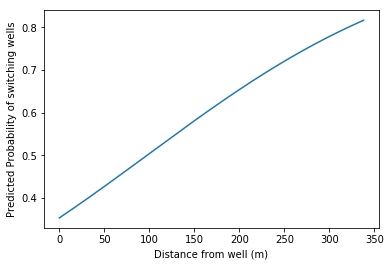

In [12]:
plt.plot([x for x in range(int(max_distance))], probabilities[:, 0])
plt.xlabel("Distance from well (m)")
plt.ylabel("Predicted Probability of switching wells")
plt.show()

3. Interpreting logistic regression coefficients: Use the “rule-of-4” discussed in class on Thursday,
to interpret the solution: what can you say about the change in the probability of switching
wells, for every additional 100 meters of distance?


In [13]:
print(fitted_model.coef_)
print(fitted_model.intercept_)

[[ 0.30297741 -0.00621875]]
[0.30297741]


For every 100m increase of distance, there is an approximate 15% increase in probability of switching wells. 

4. Now solve a logistic regression incorporating the constant term, the distance and also arsenic
levels. Report the coefficients.

In [17]:
Xnew = wells.values[:, 1:3]
Xnew = (Xnew - np.mean(Xnew, axis=0))/np.std(Xnew, axis=0)
Xnew = np.column_stack([np.ones(wells.shape[0]).T, Xnew])

clf2 = sklearn.linear_model.LogisticRegression(C=hyperparameter, solver="liblinear")
fitted_model2 = clf2.fit(Xnew, y)
print(fitted_model2.coef_) # Coefficients with arsenic

[[ 0.16642635  0.5101623  -0.34495391]]


5.  Next we want to answer the question of which factor is more significant, distance, or arsenic
levels? This is not a well specified question, since these two features have different units.
One natural choice is to ask if after normalizing by the respective standard deviations of each
feature, if moving one unit in one (normalized) feature predicts a larger change in probability
of switching wells, than moving one unit in the other (also normalized) feature. Use this
reasoning to answer the question.

According to the absolute values of the coefficients, a one unit increase of arsenic has a stronger impact on the probability of changing wells (.51) than the distance (.345). Therefore, arsenic levels are more significant.

6. Now consider all the features in the data set. Also consider adding interaction terms among
all features that have a large main effect. Use cross validation to build the best model you
can (using your training set only), and then report the test error of your best model.

In [15]:
Xfinal = wells.values[:, 4]
Xfinal = (Xfinal - np.mean(Xfinal, axis=0))/np.std(Xfinal, axis=0)

Xfinal = np.column_stack([Xnew, np.array(wells.values[:, 3]).T, Xfinal])

Cs = [1e6, 1e5, 1e4, 1e3, 1e2, 1]

clfCV = sklearn.linear_model.LogisticRegressionCV(Cs=Cs, cv=10).fit(Xfinal, y)

In [18]:
print(clfCV.score(Xfinal, y))

0.616225165562914
